In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt

In [11]:
cat = Table.read('/Users/roz18/Desktop/test/2dflens_bestredshifts_goodz_withtypesandmags_final.dat', format='ascii')
# cat = Table.read('/Users/roz18/Desktop/test/2dflens.fits')
print(len(cat))

70079


In [12]:
cat

R.A.,Dec.,z,qual,target,umag,gmag,rmag,imag,zmag,w1mag
float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64
339.008911,-35.747117,0.18767,4,3,19.3,18.56,18.39,17.72,17.33,18.58
330.895477,-35.743065,0.56861,4,3,23.4,22.29,20.59,19.55,19.18,18.0
334.767731,-35.742241,0.53598,4,3,23.04,21.54,20.25,19.46,19.09,18.52
357.242615,-35.738631,0.5822,3,3,21.89,20.92,19.82,19.06,18.61,17.94
355.252625,-35.73587,0.12302,4,2,19.19,17.32,16.36,16.01,15.64,16.13
334.99234,-35.734429,0.6904,3,4,97.41,23.23,21.28,20.08,19.5,18.14
340.969513,-35.731404,0.51084,4,6,21.16,20.35,19.48,19.26,18.94,18.09
345.103912,-35.730133,0.51514,4,3,22.67,21.88,20.25,19.44,18.89,18.35
352.961945,-35.72828,0.52881,4,3,22.09,21.01,19.99,19.37,19.17,98.99


In [13]:
cat['qual'] = np.array(cat['qual'], dtype='int32')
cat['target'] = np.array(cat['target'], dtype='int32')

In [14]:
cat

R.A.,Dec.,z,qual,target,umag,gmag,rmag,imag,zmag,w1mag
float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64
339.008911,-35.747117,0.18767,4,3,19.3,18.56,18.39,17.72,17.33,18.58
330.895477,-35.743065,0.56861,4,3,23.4,22.29,20.59,19.55,19.18,18.0
334.767731,-35.742241,0.53598,4,3,23.04,21.54,20.25,19.46,19.09,18.52
357.242615,-35.738631,0.5822,3,3,21.89,20.92,19.82,19.06,18.61,17.94
355.252625,-35.73587,0.12302,4,2,19.19,17.32,16.36,16.01,15.64,16.13
334.99234,-35.734429,0.6904,3,4,97.41,23.23,21.28,20.08,19.5,18.14
340.969513,-35.731404,0.51084,4,6,21.16,20.35,19.48,19.26,18.94,18.09
345.103912,-35.730133,0.51514,4,3,22.67,21.88,20.25,19.44,18.89,18.35
352.961945,-35.72828,0.52881,4,3,22.09,21.01,19.99,19.37,19.17,98.99


In [15]:
# mask = (cat['qual']>=3) & (cat['qual']!=6)
# print(np.sum(mask)/len(cat))
# cat = cat[mask]
# print(len(cat))

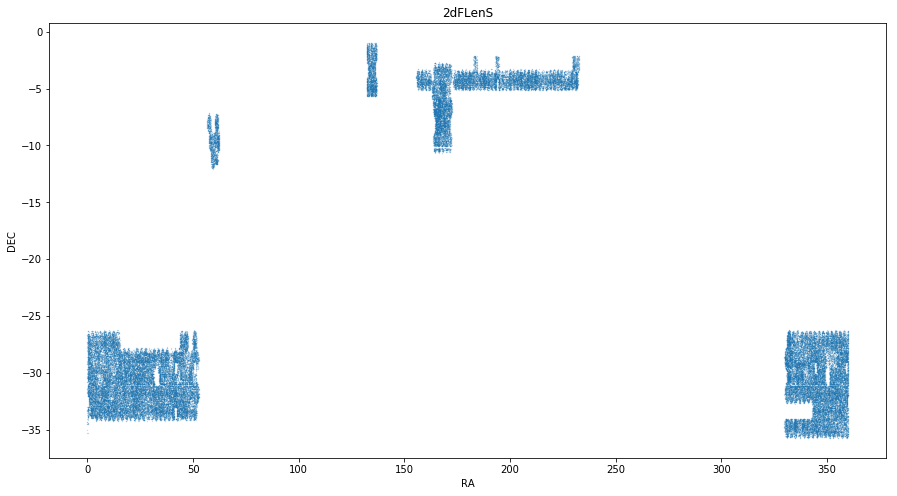

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(cat['R.A.'], cat['Dec.'], '.', markersize=0.4, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('2dFLenS')
plt.show()

__Check for duplicates__

In [17]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

112 objects with a nearby neighbor
112 0.16%


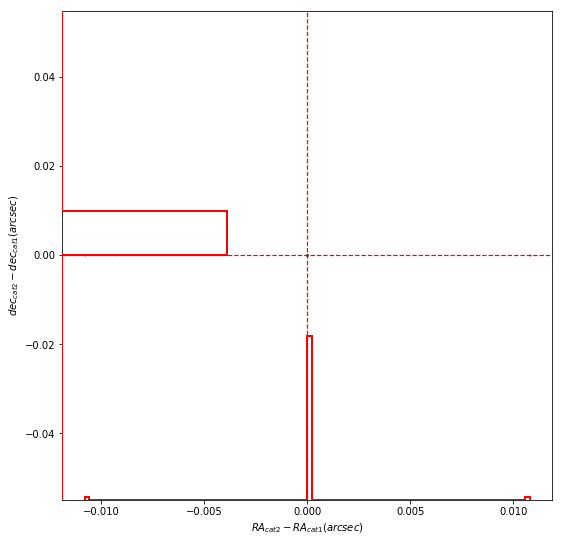

In [18]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['R.A.'], cat['Dec.'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

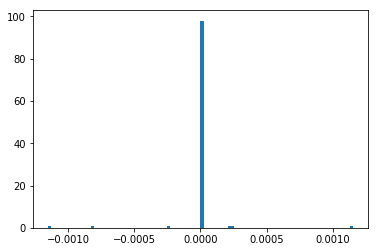

In [10]:
plt.hist(cat['z'][idx1]-cat['z'][idx2], 100)
plt.show()